# Python for R Users

## Clark Fitzgerald 

`@clarkfitzg`

## UC Davis iidata

May 21, 2016

To follow along: http://bit.ly/1RejWpI

# The Standard Library

Python's philosophy is 'batteries included'

This functionality is available with all distributions of Python.

In [81]:
# Come for the language, stay for the community
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Project Euler

Algorithm / math problems that you can help you learn to program

### Largest palindrome product
### Problem 4

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [62]:
def palindrome(number):
    """ Check if a number is a palindrome
    
    >>> palindrome(9009)
    True
    >>> palindrome(123)
    False
    
    """
    # Convert it to a string
    numstr = str(number)
    # Check if it's the same forwards and backwards
    return numstr == numstr[::-1]

palindrome

doctest.testmod(verbose=True)

Trying:
    palindrome(9009)
Expecting:
    True
ok
Trying:
    palindrome(123)
Expecting:
    False
ok
Trying:
    palindrome(9009)
Expecting:
    True
ok
Trying:
    palindrome(123)
Expecting:
    False
ok
1 items had no tests:
    __main__
2 items passed all tests:
   2 tests in __main__._40
   2 tests in __main__.palindrome
4 tests in 3 items.
4 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=4)

In [52]:
palindrome(9009)

True

In [53]:
palindrome(123)

False

In [54]:
# Now let's actually solve that problem
current = 0
for i in range(999):
    for j in range(999):
        prod = i * j
        if palindrome(prod):
            current = max(current, prod)
            
current

906609

In [55]:
# But there's a more elegant way :)
import itertools

In [56]:
pairs = itertools.product(range(999), range(999))
products = (a * b for a, b in pairs)
max(p for p in products if palindrome(p))

906609

## Slicing

numerical indexing to slice an iterable

In [57]:
letters = 'abcdef'
letters

'abcdef'

In [58]:
letters[:3]

'abc'

In [59]:
letters[::2]

'ace'

In [83]:
# Python generally avoids copies! This is different than R
a = list(letters)
a

['a', 'b', 'c', 'd', 'e', 'f']

In [86]:
# Python also has 0 based indexing- R is 1 based

b = a
b[0] = 'A'
b

['A', 'b', 'c', 'd', 'e', 'f']

In [85]:
a

['A', 'b', 'c', 'd', 'e', 'f']

In [60]:
# Reverse a string
letters[::-1]

'fedcba'

# Data Analysis

Here is where we need more than the standard library

In [18]:
# A few preliminaries

# Import the data analysis libraries we'll use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lets us plot
%matplotlib inline
plt.style.use('ggplot')

## Pandas

Brings R's `DataFrame` to Python

Today we'll download a dataset from STS98, data studies. (Thanks Nick!)

http://anson.ucdavis.edu/~nulle/cl_apartments.zip

In [2]:
import pandas as pd

In [3]:
apt = pd.read_csv('cl_apartments.csv')

In [95]:
apt.shape

In [93]:
apt.iloc[:5, :4]

,title,text,date_posted,date_updated
0,$995 / 3br - 1350ft2 - Lancaster Apartment Uni...,"Beautiful Remodeled 3 Bed, 2 Bath House in Wes...",2016-04-13 15:34:06,2016-05-01 15:46:36
1,$1935 / 2br - 1154ft2 - No place like The Colo...,"View Our Captivating Pools, Spa & Picnic Area\...",2016-04-16 17:55:45,2016-05-01 19:40:19
2,$1825 / 2br - 1056ft2 - No place like The Colo...,"*******Centrally located near Saugus, The Ante...",2016-04-16 17:58:01,2016-05-01 19:39:54
3,"$650 / 1br - FURNISHED 1 BED GUEST QUARTERS, D...",FURNISHED 1 BEDROOM & DEN W/ KITCHENETTE GUEST...,2016-04-17 21:26:15,2016-05-01 12:49:13
4,$1599 / 2br - 951ft2 - Big Savings!,Accepting applications now.,2016-04-28 11:58:28,2016-05-01 10:44:00


In [97]:
apt.dtypes

title            object
text             object
date_posted      object
date_updated     object
deleted            bool
craigslist       object
latitude        float64
longitude       float64
city             object
price           float64
date             object
sqft            float64
bedrooms        float64
bathrooms       float64
pets             object
laundry          object
parking          object
shp_place        object
shp_city         object
shp_urban        object
shp_county       object
shp_state        object
dtype: object

In [23]:
# Plotting
import seaborn as sns

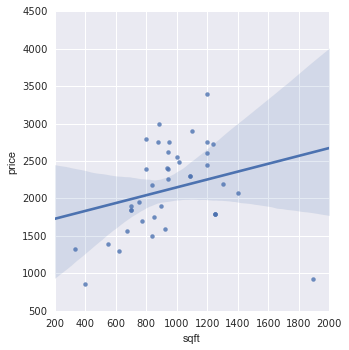

In [26]:
sns.lmplot(x='sqft', y='price', data=apt.iloc[200:300, ])

## Statistical Modeling

In [27]:
import statsmodels.formula.api as smf

In [29]:
smf.OLS?

In [32]:
model = smf.ols('price ~ sqft', data=apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.05
Date:                Fri, 20 May 2016   Prob (F-statistic):           2.16e-05
Time:                        22:55:59   Log-Likelihood:            -1.1169e+05
No. Observations:               13159   AIC:                         2.234e+05
Df Residuals:                   13157   BIC:                         2.234e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2330.1164     10.514    221.625      0.000      2309.508  2350.725
sqft           0.0108      0.003      4.249      0.000         0.006     0.016
==============================================================================
Omnibus:                     9908.362   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           536353.862
Skew:                           3.111   Prob(JB):                         0.00
Kurtosis:                      33.651   Cond. No.                     4.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Do highly-populated areas tend to have smaller apartments? If you're unfamiliar with California's cities, it may help to consult this page: https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_California

On average, what are the most expensive cities?

In [99]:
# Method chaining code can be easier to read.
# Similar to pipes

(apt2.loc[:, ['shp_city', 'price']]
 .groupby('shp_city')
 .median()
 .sort_values('price', ascending=False)
 .head(15)
 )

,price
shp_city,
Piedmont,7300.0
San Marino,6900.0
Belvedere,6500.0
Beverly Hills,4325.0
Los Altos,3617.5
Woodside,3600.0
Manhattan Beach,3500.0
Culver City,3493.5
Tiburon,3479.0


In [12]:
set(apt.shp_city)

{nan,
 'Union City',
 'Milpitas',
 'Livermore',
 'Fairfax',
 'San Mateo',
 'Belmont',
 'Los Altos Hills',
 'Woodland',
 'Corte Madera',
 'Tiburon',
 'Chula Vista',
 'Orinda',
 'Monterey Park',
 'South San Francisco',
 'Truckee',
 'Ross',
 'Placerville',
 'Pittsburg',
 'Brea',
 'Anaheim',
 'Yuba City',
 'Bellflower',
 'Antioch',
 'Manteca',
 'Azusa',
 'Suisun City',
 'Lakewood',
 'West Covina',
 'Woodside',
 'Palmdale',
 'Isleton',
 'Danville',
 'Dublin',
 'Burbank',
 'Sebastopol',
 'Encinitas',
 'Fairfield',
 'San Dimas',
 'Vacaville',
 'Riverside',
 'Alhambra',
 'Hesperia',
 'Seal Beach',
 'Lancaster',
 'Healdsburg',
 'Redondo Beach',
 'Pasadena',
 'Poway',
 'Carlsbad',
 'Pleasanton',
 'Albany',
 'Sunnyvale',
 'Coronado',
 'Windsor',
 'Emeryville',
 'Solana Beach',
 'Glendora',
 'San Anselmo',
 'Covina',
 'San Ramon',
 'Larkspur',
 'Upland',
 'Calabasas',
 'Davis',
 'Culver City',
 'Sausalito',
 'Ukiah',
 'Folsom',
 'Inglewood',
 'Marysville',
 'Brisbane',
 'Industry',
 'Tracy',
 'Roc

In [4]:
# Let's scrape the web!
cali = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_California')

In [5]:
# Always know what your data types are
type(cali)

list

In [6]:
len(cali)

7

In [9]:
[x.shape for x in cali]

[(1, 2), (485, 7), (1, 2), (8, 11), (7, 2), (14, 19), (13, 2)]

In [11]:
cities = cali[1]
cities.head()

,0,1,2,3,4,5,6
0,Name,Type,County,Population (2010)[1][7][8],Land area[1],Incorporated[6],NaN
1,sq mi,km2,NaN,NaN,NaN,NaN,NaN
2,Adelanto,City,San Bernardino,31765,56.01,145.1,"000000001970-12-22-0000December 22, 1970"
3,Agoura Hills,City,Los Angeles,20330,7.79,20.2,"000000001982-12-08-0000December 8, 1982"
4,Alameda,City,Alameda,73812,10.61,27.5,"000000001854-04-19-0000April 19, 1854"


In [37]:
?c2.astype

In [72]:
c2 = cities.iloc[2:, [0, 3, 4]]
c2.columns = ['shp_city', 'population', 'land']

c2.head()

,shp_city,population,land
2,Adelanto,31765,56.01
3,Agoura Hills,20330,7.79
4,Alameda,73812,10.61
5,Albany,18539,1.79
6,Alhambra,83089,7.63


In [65]:
# Footnotes and commas in HTML! Dang!
import re
x = '123,400[8]'
pattern = re.compile(r',|\[[0-9]*\]')
re.sub(pattern, '', x, count=5)

'123400'

`lambda` just means make a function in one line.

In [73]:
c2[['population', 'land']] = (c2[['population', 'land']]
            .applymap(lambda x: re.sub(pattern, '', x))
            .astype('float64')
            )

In [77]:
c2['density'] = c2['population'] / c2['land']

In [78]:
c2.dtypes

shp_city       object
population    float64
land          float64
density       float64
dtype: object

Now we're ready to join it into the main table

In [87]:
apt2 = pd.merge(apt, c2)
apt2.shape

(15245, 25)

In [116]:
# Better check how well this worked
sum(apt2.population.isnull())

0

Recall the question: Do highly-populated areas tend to have smaller apartments?

In [113]:
apt2.sqft.corr(apt2.population)

0.0037722587722730811

In [114]:
apt2.sqft.corr(apt2.density)

0.027354362941064529

Common sense check- what are the most densely populated cities in California?

In [112]:
dense = c2.loc[c2.population > 1e5, :].sort_values('density', ascending=False)
dense

,shp_city,population,land,density
373,San Francisco,805235.0,46.87,17180.179219
105,Daly City,101123.0,7.66,13201.436031
193,Inglewood,109673.0,9.07,12091.841235
390,Santa Ana,324528.0,27.27,11900.550055
127,El Monte,113475.0,9.56,11869.769874
290,Norwalk,105549.0,9.71,10870.133883
39,Berkeley,112580.0,10.47,10752.626552
155,Garden Grove,170883.0,17.94,9525.250836
237,Long Beach,462257.0,50.29,9191.827401
118,Downey,111772.0,12.41,9006.607575


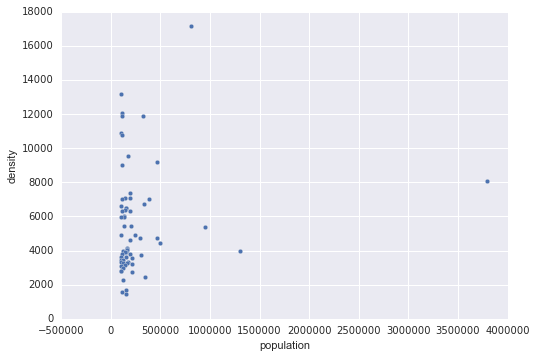

In [110]:
dense.plot(x='population', y='density', kind='scatter')

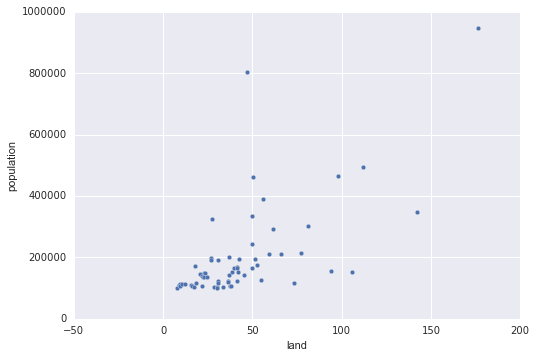

In [118]:
dense.loc[dense.population < 1e6, :].plot(x='land', y='population', kind='scatter')

## Machine Learning

We went to all this trouble to get the data, might as well use it!

In [120]:
apt2.dtypes

title            object
text             object
date_posted      object
date_updated     object
deleted            bool
craigslist       object
latitude        float64
longitude       float64
city             object
price           float64
date             object
sqft            float64
bedrooms        float64
bathrooms       float64
pets             object
laundry          object
parking          object
shp_place        object
shp_city         object
shp_urban        object
shp_county       object
shp_state        object
population      float64
land            float64
density         float64
dtype: object

To put it into a machine learning algorithm we need to first take care of all the missing values

In [155]:
apt3 = apt2.loc[:, ['price', 'latitude', 'longitude', 'sqft', 'bedrooms', 'bathrooms', 'population', 'land', 'density']]
nullrows = apt3.isnull().any(axis=1)
apt4 = apt3.loc[~nullrows, :]
apt4.shape

(10832, 9)

In [158]:
X = apt4.iloc[:, 1:].as_matrix()
y = apt4.iloc[:, 0].as_matrix()

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rf = RandomForestRegressor().fit(X, y)

In [163]:
rf.score(X, y)

0.96031438731532159

In [166]:
linmod = smf.OLS(y, X).fit()
linmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Sat, 21 May 2016   Prob (F-statistic):               0.00
Time:                        00:34:39   Log-Likelihood:                -88815.
No. Observations:               10832   AIC:                         1.776e+05
Df Residuals:                   10824   BIC:                         1.777e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -10.4376      7.983     -1.307      0.191       -26.086     5.211
x2            -7.3445      2.517     -2.918      0.004       -12.279    -2.410
x3             0.0019      0.002      0.962      0.336        -0.002     0.006
x4           303.4792     15.268     19.877      0.000       273.551   333.408
x5           503.1857     22.420     22.444      0.000       459.239   547.133
x6             0.0001   2.92e-05      4.146      0.000      6.37e-05     0.000
x7            -1.6553      0.226     -7.325      0.000        -2.098    -1.212
x8             0.1364      0.003     50.568      0.000         0.131     0.142
==============================================================================
Omnibus:                     8159.177   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           654728.978
Skew:                           2.972   Prob(JB):                         0.00
Kurtosis:                      40.621   Cond. No.                     3.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Symbolic Math

Remember how to solve that integral?

Thanks to Matt Rocklin and Andy Terrel https://www.researchgate.net/publication/260585491_Symbolic_Statistics_with_SymPy

In [76]:
import sympy
from sympy.stats import Normal, density, P

sympy.init_printing()

In [89]:
X = Normal('X', mean=3, std=1)
Y = X + 5
Y

In [77]:
?Normal